<a href="https://colab.research.google.com/github/araccg/SCS3250-Group-1-Final-Project/blob/master/SCS3250_Group_1_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Basketball's Next Superstar
### SCS 3250: Foundations of Data Science
#### Ryan Acker | Araceli Cuellar | Owen Kewell | Ghufran Khan | Ketan Khanna

## Table of Contents
###### 1. Introduction
###### 2. Objectives
###### 3. Data Source
###### 4. Pre-Preparation
###### 5. Data Preparation
###### 6. Build Training Set
###### 7. Data Exploration & Visualization
###### 8. Baseline Regression Model
###### 9. Improving Model Performance
###### 10. Use Cases
###### 11. Limitations
###### 12. Conclusions
###### 13. Glossary
###### 14. Sources


## 1. Introduction

  The primary focus of an NBA team’s executive management is to win basketball games. This is done by assembling the players who can best contribute on both the offensive and defensive ends of the court. While traditional qualitative scouting of player performance remains indispensable, teams are increasingly relying on statistical analysis and predictive modeling to gain a competitive advantage, with many teams employing data scientists and statisticians (1). These quantitative assessments can help inform key managerial decisions, such as drafting and contract allocation, so as to ensure teams receive a positive return (in terms of basketball performance) on the investment they make in players. In particular, quantitative analysis can leverage data from an NBA player's past performance to predict their future value. Given that many members of our group are passionate sports and basketball fans, we have chosen to explore this topic for our project.
  
  In order to predict player performance, we must first quantify performance. Thankfully, there are many sophisticated 'catch-all' statistics that capture a player's overall contributions within a single number. One such statistic is Player Efficiency Rating, or PER, as developed by ESPN.com columnist John Hollinger. In John's words, "PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance" (2). Per is calculated each season for each player.
  
  We have selected peak career PER as the target for our predictive model because we believe that PER is a strong measure of a player’s overall performance. PER is multi-faceted: the formula to calculate PER includes traditional metrics such as points, assists, blocks, rebounds (both offensive and defensive), steals and 3 pointers, alongside efficiency metrics like free throw percentage (FT%) and field goal percentage (%) (2). By combining these variables with one another, PER provides a strong (albeit imperfect) assessment of a basketball player's overall performance, and therefore their overall contributions toward winning basketball games.

Peak PER is defined as the max PER a player achieves during their career. PER is calculated each season. So the season with the highest PER is the max. This max reflects the highest level of performance a player is able to achieve during their career. 


  



## 2. Objectives

 In this analysis, our main objective is to develop a model capable of predicting a player's peak PER - in other words how good they were in their best season - by leveraging data from that player's first 3 seasons. We have chosen first 3 seasons as a representation of early-career performance.

  Within this main objective, we hope to answer multiple key questions:

1.   How accurately can we predict peak performance using a player's first 3 NBA seasons?
2.   Which current young NBA players are most likely to achieve the highest peak performance? Who should teams target?
3.   How should NBA managers use our findings?


  Our hypothesis is that a player's first 3 seasons are highly predictive of their career peak PER. Anectodally, players such as Michael Jordan, Lebron James and Shaquille O’Neal all performed extremely well during their first 3 seasons, and continued to develop into some of the greatest basketball players of all time. Building a predictive model will allow us to validate or disprove this hypothesis. Additionally, our model will be useful in determining to what extent executive management can and should utilize data and predictive modeling to determine an NBA player's future productivity. 
  
  

## 3. Data Source

Our primary dataset was found on Kaggle (3) and contains information on every NBA player between 1950 and 2017.

The data was broken down by season and featured three csv files:

*   Season_Stats.csv: In-game player statistics. This file was the most crucial for our analysis.
*   Players.csv: Information on the players such as height, weight and city of birth. We omitted this file from our analysis.
*   player_data.csv: Very similar to Players.csv, but with an important feature: the year the player began their career. 

In order to get the most recent data (2018 and 2019), we turned to Basketball-reference.com (4). our Kaggle dataset came from this website, so as we will see merging the two datasets was straightforward. Basketball Reference also allows users to run queries, export directly to csv, and view a glossary containing definitions for every statistic in their database (5). We have included a number of these definitions in the 'Glossary' section to provide explanations of any technical basketball terminology.

## 4. Pre-Preparation


Considering that PER is a quantitative variable, we decided that our model would be built using linear regression. To begin this process, we imported the libraries necessary for data wrangling, analysis, modelling, and visualization.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from scipy import stats

Next, we read in our data from CSV's sourced from Kaggle and a scraping of basketball-reference.com. As we will see, these data files are quite structured and clean. We are quite confident in the quality of this data given that the NBA publishes statistical data for every game and season and has made substantial investments in the technology and infrastructure to ensure data accuracy (6).

In [0]:
df1950to2017=pd.read_csv('https://raw.githubusercontent.com/araccg/SCS3250-Group-1-Final-Project/master/Seasons_Stats.csv')
player_data=pd.read_csv('https://raw.githubusercontent.com/araccg/SCS3250-Group-1-Final-Project/master/player_data.csv')
df2018=pd.read_csv('https://raw.githubusercontent.com/araccg/SCS3250-Group-1-Final-Project/master/2018.csv')
df2019=pd.read_csv('https://raw.githubusercontent.com/araccg/SCS3250-Group-1-Final-Project/master/2019.csv')


## 5. Data Preparation

Below are the steps we took to prepare the data for modelling:

*   Identified and removed columns made up of entirely missing data. These rows were empty placeholders that served to physically separate sections of data on basketball-reference.com (for visual purposes).
*   Combined the 1950-2017 data with the 2018 and 2019 data. This was easy since they have matching features.
*   Using our basketball domain knowledge, we identified and removed the features that we did not believe would be relevent to the model's prediction of PER. We did this to manage model complexity and ensure its ability to generalize to new data. 
*   Removed the rows where player name was missing. There were few of these rows and having a value for player name is essential to our analysis, so we chose to remove them rather than invest the time to impute them.
*   Converted year from float to integer to remove the decimal.
*   Addressed missing values for shooting statistics. Players with zero shot attempts were returning errors for shooting efficiency, so we imputed values of '0' in these cases.
*   Merged the 1950-2019 dataset with the set containing player information (including draft year).
*   Engineered a new feature called 'Season' because we only want our training set to contain data from players' first NBA 3 seasons. This feature was calculated by subtracting the year a player was drafted from the current year.
*   Filtered out players who played less than 10 games in a season. Since there are 82 games per season we wanted to reduce outliers caused by insufficent sample size.













In [0]:
# Combine 2018 and 2019 data (features are identical)
df20182019=pd.concat([df2018, df2019])

In [0]:
df1950to2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [0]:
df20182019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 707
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1372 non-null   int64  
 1   Player       1372 non-null   object 
 2   Pos          1372 non-null   object 
 3   Age          1372 non-null   int64  
 4   Tm           1372 non-null   object 
 5   G            1372 non-null   int64  
 6   GS           1372 non-null   int64  
 7   MP           1372 non-null   int64  
 8   PER          1372 non-null   float64
 9   TS%          1362 non-null   float64
 10  3PAr         1362 non-null   float64
 11  FTr          1362 non-null   float64
 12  ORB%         1372 non-null   float64
 13  DRB%         1372 non-null   float64
 14  TRB%         1372 non-null   float64
 15  AST%         1372 non-null   float64
 16  STL%         1372 non-null   float64
 17  BLK%         1372 non-null   float64
 18  TOV%         1362 non-null   float64
 19  USG%   

In [0]:
# Remove columns that contain only null values
df1950to2017=df1950to2017.drop(columns=['blanl', 'blank2','Unnamed: 0'])
df20182019=df20182019.drop(columns=['Unnamed: 20', 'Unnamed: 25','MP.1'])

In [0]:
# Combine the two dataframes
dffinal=pd.concat([df1950to2017, df20182019])

# Remove the stats that we determined were less relevant to our analysis through domain knowledge. Doing this will reduce model complexity, which may help its ability to generalize. 
droplist=['VORP','WS/48','Pos','2P', '2PA', '3P', '3PA','PF', 'ORB', 'DRB','FT', 'FTA','FG', 'FGA', 'ORB%', 'DRB%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM']
dffinal=dffinal.drop(columns=droplist)

dffinal.sample(10)

,Year,Player,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5612,1979.0,Mark Olberding,22.0,SAS,80.0,NaN,1885.0,12.4,0.556,NaN,0.526,12.0,13.1,1.2,0.5,19.4,16.9,4.2,0.474,NaN,0.474,0.474,0.803,429.0,211.0,53.0,18.0,163.0,755.0
1604,1961.0,Mike Farmer,24.0,CIN,57.0,NaN,1295.0,10.2,0.428,NaN,0.204,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,0.391,NaN,0.391,0.391,0.734,378.0,81.0,NaN,NaN,NaN,429.0
12376,1996.0,Derrick Coleman,28.0,PHI,11.0,11.0,294.0,12.0,0.466,0.178,0.271,14.1,19.3,0.7,2.5,17.5,24.3,-0.2,0.407,0.333,0.423,0.436,0.625,72.0,31.0,4.0,10.0,28.0,123.0
81,2019.0,Malcolm Brogdon\brogdma01,26.0,MIL,64.0,64.0,1832.0,17.8,0.614,0.326,0.203,8.0,16.2,1.2,0.6,10.0,20.7,6.5,0.505,0.426,0.544,0.575,0.928,288.0,205.0,46.0,13.0,91.0,1001.0
5468,1979.0,Leon Douglas,24.0,DET,78.0,NaN,2215.0,12.1,0.529,NaN,0.470,15.6,4.3,0.8,1.3,18.4,17.7,3.1,0.490,NaN,0.490,0.490,0.634,664.0,74.0,39.0,55.0,190.0,892.0
8565,1987.0,Clint Richardson,30.0,IND,78.0,14.0,1396.0,12.8,0.501,0.036,0.158,5.6,24.3,1.7,0.3,14.5,17.5,2.1,0.467,0.353,0.471,0.473,0.797,143.0,241.0,49.0,7.0,85.0,501.0
20953,2011.0,Morris Peterson,33.0,OKC,4.0,0.0,23.0,1.7,0.400,0.200,0.000,7.6,6.4,0.0,0.0,0.0,9.9,0.0,0.400,0.000,0.500,0.400,NaN,3.0,1.0,0.0,0.0,0.0,4.0
96,2019.0,Trey Burke\burketr01,26.0,DAL,25.0,1.0,436.0,17.9,0.574,0.384,0.258,4.5,24.7,1.3,0.4,8.6,22.8,1.3,0.463,0.356,0.530,0.532,0.837,37.0,65.0,12.0,2.0,20.0,243.0
12309,1996.0,Greg Anthony,28.0,VAN,69.0,68.0,2096.0,18.6,0.530,0.347,0.380,4.9,41.9,2.9,0.4,14.9,23.3,4.8,0.415,0.332,0.459,0.472,0.771,174.0,476.0,116.0,11.0,160.0,967.0
19224,2008.0,Joe Smith,32.0,TOT,77.0,36.0,1726.0,16.1,0.524,0.005,0.312,13.1,6.7,1.0,2.1,8.7,21.0,4.1,0.478,0.000,0.480,0.478,0.755,401.0,66.0,34.0,47.0,71.0,778.0


In [0]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26063 entries, 0 to 707
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    25996 non-null  float64
 1   Player  25996 non-null  object 
 2   Age     25988 non-null  float64
 3   Tm      25996 non-null  object 
 4   G       25996 non-null  float64
 5   GS      19605 non-null  float64
 6   MP      25510 non-null  float64
 7   PER     25473 non-null  float64
 8   TS%     25900 non-null  float64
 9   3PAr    20201 non-null  float64
 10  FTr     25887 non-null  float64
 11  TRB%    22943 non-null  float64
 12  AST%    23927 non-null  float64
 13  STL%    22164 non-null  float64
 14  BLK%    22164 non-null  float64
 15  TOV%    20944 non-null  float64
 16  USG%    21012 non-null  float64
 17  WS      25957 non-null  float64
 18  FG%     25887 non-null  float64
 19  3P%     16676 non-null  float64
 20  2P%     25835 non-null  float64
 21  eFG%    25887 non-null  float64
 22  

In [0]:
# Post merger, remove rows where 'Player' is missing
dffinal=dffinal.dropna(subset=['Player'])
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25996 entries, 0 to 707
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    25996 non-null  float64
 1   Player  25996 non-null  object 
 2   Age     25988 non-null  float64
 3   Tm      25996 non-null  object 
 4   G       25996 non-null  float64
 5   GS      19605 non-null  float64
 6   MP      25510 non-null  float64
 7   PER     25473 non-null  float64
 8   TS%     25900 non-null  float64
 9   3PAr    20201 non-null  float64
 10  FTr     25887 non-null  float64
 11  TRB%    22943 non-null  float64
 12  AST%    23927 non-null  float64
 13  STL%    22164 non-null  float64
 14  BLK%    22164 non-null  float64
 15  TOV%    20944 non-null  float64
 16  USG%    21012 non-null  float64
 17  WS      25957 non-null  float64
 18  FG%     25887 non-null  float64
 19  3P%     16676 non-null  float64
 20  2P%     25835 non-null  float64
 21  eFG%    25887 non-null  float64
 22  

In [0]:
# Convert year from float to integer
dffinal.Year=dffinal.Year.astype(int)

In [0]:
# Many shooting metrics (such as 3-Point %) rely on shot attempts, and players with zero shot attempts were returning errors.   
dffinal[dffinal['3P%'].isna()]

,Year,Player,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950,Curly Armstrong,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,3.5,0.279,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950,Cliff Barker,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,2.2,0.372,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950,Leo Barnhorst,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,3.6,0.349,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950,Ed Bartels,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.256,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950,Ed Bartels,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,0.256,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2019,Tyler Zeller\zellety01,29.0,MEM,4.0,1.0,82.0,19.4,0.640,0.0,0.643,12.3,6.2,0.6,3.5,10.0,21.8,0.3,0.571,NaN,0.571,0.571,0.778,18.0,3.0,1.0,3.0,4.0,46.0
704,2019,Ante Žižić\zizican01,22.0,CLE,59.0,25.0,1082.0,16.2,0.590,0.0,0.399,16.4,7.7,0.6,1.8,13.6,18.2,2.0,0.553,NaN,0.553,0.553,0.705,320.0,53.0,13.0,22.0,61.0,459.0
705,2019,Ivica Zubac\zubaciv01,21.0,TOT,59.0,37.0,1040.0,18.9,0.604,0.0,0.332,18.2,9.1,0.6,4.0,13.9,20.3,3.2,0.559,NaN,0.559,0.559,0.802,362.0,63.0,14.0,51.0,70.0,525.0
706,2019,Ivica Zubac\zubaciv01,21.0,LAL,33.0,12.0,516.0,19.5,0.633,0.0,0.342,16.2,7.3,0.4,4.3,12.9,20.5,1.8,0.580,NaN,0.580,0.580,0.864,162.0,25.0,4.0,27.0,33.0,281.0


In [0]:
#For these shooting statistics we replace missing values with 0.
dffinal['3P%']=dffinal['3P%'].fillna(0)
dffinal['FT%']=dffinal['FT%'].fillna(0)
dffinal['2P%']=dffinal['2P%'].fillna(0)
dffinal['FG%']=dffinal['FG%'].fillna(0)

In [0]:
#Extract the player's draft year and merge onto dataframe.
player_data=player_data.iloc[:, :2]
dffinal=dffinal.merge(player_data, left_on='Player', right_on='name')

In [0]:
#Derive a column to indicate what season a player is on. 1 would be a rookie year.
dffinal['Season']=(dffinal.Year-dffinal['year_start'])+1

In [0]:
# Filter out players who played fewer than 10 games in a season for sample size concerns and its ability to produce outliers. 
dffinal=dffinal[dffinal.G>9]

In [0]:
dffinal

,Year,Player,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,name,year_start,Season
0,1950,Curly Armstrong,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,3.5,0.279,0.000,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0,Curly Armstrong,1949,2
1,1951,Curly Armstrong,32.0,FTW,38.0,NaN,NaN,NaN,0.372,NaN,0.388,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.310,0.000,0.310,0.310,0.644,89.0,77.0,NaN,NaN,NaN,202.0,Curly Armstrong,1949,3
2,1950,Cliff Barker,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,2.2,0.372,0.000,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0,Cliff Barker,1950,1
3,1951,Cliff Barker,30.0,INO,56.0,NaN,NaN,NaN,0.322,NaN,0.381,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,0.252,0.000,0.252,0.252,0.649,100.0,115.0,NaN,NaN,NaN,152.0,Cliff Barker,1950,2
4,1952,Cliff Barker,31.0,INO,44.0,NaN,494.0,10.8,0.343,NaN,0.317,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.298,0.000,0.298,0.298,0.588,81.0,70.0,NaN,NaN,NaN,126.0,Cliff Barker,1950,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462,2017,Troy Williams,22.0,MEM,24.0,13.0,418.0,7.6,0.474,0.333,0.203,6.2,7.2,3.0,2.1,16.8,17.5,0.0,0.415,0.244,0.500,0.455,0.600,45.0,19.0,24.0,9.0,27.0,127.0,Troy Williams,2017,1
23464,2017,Kyle Wiltjer,24.0,HOU,14.0,0.0,44.0,6.7,0.437,0.929,0.143,12.4,6.1,3.3,1.8,25.2,19.1,0.0,0.286,0.308,0.000,0.429,0.500,10.0,2.0,3.0,1.0,5.0,13.0,Kyle Wiltjer,2017,1
23465,2017,Stephen Zimmerman,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,17.6,5.3,0.9,3.7,8.3,14.8,0.0,0.323,0.000,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0,Stephen Zimmerman,2017,1
23466,2017,Paul Zipser,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,8.0,6.1,0.9,1.5,14.4,14.4,0.5,0.398,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0,Paul Zipser,2017,1


## 6. Build Training Set


Next, we set out to build the data on which our model would be trained. In order to do this, we made a number of decisions:
*   We filtered to remove missing row values and only include data between 1984 and 2006. We wanted to limit our reliance on data from the 1950's, 1960's, and 1970's, as the game of basketball has changed substantially since then.
*   We filtered on our engineered 'Season' feature to only include player data from their first 3 seasons. 
*   We deleted the features that were intentionally omitted from our model.
*   A 3-year average was calculated for each remaining feature.
*   Finally,  for each player we calculated their career maximum PER. 







In [0]:
#Filter our data to only include the years 1984 to 2006 and the first three years of a player's career
dftrain=dffinal[(dffinal.Year>=1984) & (dffinal.Year<=2006)]
dftrain=dftrain[(dftrain.Season<=3) & (dftrain.Season>=0)]

In [0]:
#Find Max PER per player. This will be our model's target.
MAXPER=dffinal.groupby(by="Player").max()['PER']
MAXPER

Player
A.C. Green            17.8
A.J. English          12.5
A.J. Guyton           11.8
A.J. Hammons           8.4
A.J. Price            17.1
                      ... 
Zeljko Rebraca        16.2
Zendon Hamilton       18.2
Zoran Dragic           8.2
Zoran Planinic        12.5
Zydrunas Ilgauskas    21.9
Name: PER, Length: 3335, dtype: float64

In [0]:
#Merge Max PER onto the training set.
dftrain2=dftrain.merge(MAXPER, left_on='Player', right_on='Player')
dftrain2.sample(10)

,Year,Player,Age,Tm,G,GS,MP,PER_x,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,name,year_start,Season,PER_y
712,1988,Dave Hoppen,23.0,TOT,39.0,8.0,642.0,11.4,0.528,0.005,0.339,15.1,6.7,1.0,0.5,15.0,15.6,0.8,0.459,0.000,0.462,0.459,0.871,174.0,32.0,13.0,6.0,37.0,222.0,Dave Hoppen,1988,1,13.2
173,1985,Roy Hinson,23.0,CLE,76.0,75.0,2344.0,16.0,0.551,0.003,0.406,13.8,4.3,1.0,4.1,13.6,21.6,5.0,0.503,0.000,0.504,0.503,0.721,596.0,68.0,51.0,173.0,171.0,1201.0,Roy Hinson,1984,2,17.4
3396,2006,David Harrison,23.0,IND,67.0,17.0,1034.0,11.8,0.519,0.000,0.592,14.2,2.4,1.2,4.2,17.6,20.2,1.5,0.503,0.000,0.503,0.503,0.511,254.0,14.0,23.0,59.0,79.0,385.0,David Harrison,2005,2,12.9
3118,2003,Ronald Murray,23.0,TOT,14.0,0.0,62.0,6.6,0.391,0.161,0.258,3.8,13.9,3.4,0.0,18.8,32.0,-0.3,0.355,0.000,0.423,0.355,0.625,4.0,5.0,4.0,0.0,8.0,27.0,Ronald Murray,2003,1,15.4
1933,1997,Sharone Wright,24.0,TOR,60.0,28.0,1009.0,7.4,0.423,0.002,0.330,10.8,4.9,0.8,4.0,16.8,24.6,-1.6,0.400,0.000,0.400,0.400,0.511,186.0,28.0,15.0,50.0,93.0,390.0,Sharone Wright,1995,3,17.3
1700,1994,Ervin Johnson,26.0,SEA,45.0,3.0,280.0,16.1,0.463,0.000,0.434,25.0,3.6,1.8,5.6,16.0,23.0,0.7,0.415,0.000,0.415,0.415,0.630,118.0,7.0,10.0,22.0,24.0,117.0,Ervin Johnson,1994,1,16.1
1725,1995,Chris Mills,25.0,CLE,80.0,79.0,2814.0,11.6,0.520,0.281,0.249,8.1,9.7,1.2,1.0,11.2,18.2,5.4,0.420,0.392,0.431,0.475,0.817,366.0,154.0,59.0,35.0,120.0,986.0,Chris Mills,1994,2,16.2
2357,1998,Kevin Ollie,25.0,ORL,19.0,0.0,216.0,9.9,0.508,0.018,0.804,4.9,25.8,1.8,0.0,27.0,22.0,0.0,0.411,0.000,0.418,0.411,0.689,18.0,33.0,7.0,0.0,28.0,77.0,Kevin Ollie,1998,1,14.3
1113,1990,Kenny Payne,23.0,PHI,35.0,4.0,216.0,10.7,0.492,0.093,0.167,6.8,7.1,1.6,1.7,14.7,26.7,0.0,0.435,0.400,0.439,0.454,0.889,26.0,10.0,7.0,6.0,20.0,114.0,Kenny Payne,1990,1,14.2
2517,2001,Dirk Nowitzki,22.0,DAL,82.0,82.0,3125.0,22.8,0.601,0.313,0.431,13.5,9.4,1.3,2.3,9.5,23.8,14.6,0.474,0.387,0.513,0.534,0.838,754.0,173.0,79.0,101.0,156.0,1784.0,Dirk Nowitzki,1999,3,28.1


In [0]:
#Take the average of player stats for their first 3 years in the league
dftrain3=dftrain2.groupby(by="Player").mean()

In [0]:
dftrain3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, A.C. Green to Zydrunas Ilgauskas
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1412 non-null   float64
 1   Age         1412 non-null   float64
 2   G           1412 non-null   float64
 3   GS          1412 non-null   float64
 4   MP          1412 non-null   float64
 5   PER_x       1412 non-null   float64
 6   TS%         1412 non-null   float64
 7   3PAr        1412 non-null   float64
 8   FTr         1412 non-null   float64
 9   TRB%        1412 non-null   float64
 10  AST%        1412 non-null   float64
 11  STL%        1412 non-null   float64
 12  BLK%        1412 non-null   float64
 13  TOV%        1412 non-null   float64
 14  USG%        1412 non-null   float64
 15  WS          1412 non-null   float64
 16  FG%         1412 non-null   float64
 17  3P%         1412 non-null   float64
 18  2P%         1412 non-null   float64
 19  eFG%     

In [0]:
# Drop rows with missing values (if any) 
dftrain3=dftrain3.dropna(axis=0)


In [0]:
dftrain3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, A.C. Green to Zydrunas Ilgauskas
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1412 non-null   float64
 1   Age         1412 non-null   float64
 2   G           1412 non-null   float64
 3   GS          1412 non-null   float64
 4   MP          1412 non-null   float64
 5   PER_x       1412 non-null   float64
 6   TS%         1412 non-null   float64
 7   3PAr        1412 non-null   float64
 8   FTr         1412 non-null   float64
 9   TRB%        1412 non-null   float64
 10  AST%        1412 non-null   float64
 11  STL%        1412 non-null   float64
 12  BLK%        1412 non-null   float64
 13  TOV%        1412 non-null   float64
 14  USG%        1412 non-null   float64
 15  WS          1412 non-null   float64
 16  FG%         1412 non-null   float64
 17  3P%         1412 non-null   float64
 18  2P%         1412 non-null   float64
 19  eFG%     

In [0]:
#Drop columns that are unnecessary to the model
droplist3=["Year", "Season", "year_start", "Age"]
dftrain3=dftrain3.drop(columns=droplist3)


In [0]:
# View sample of training data to ensure it is prepared correctly
dftrain3.sample(5)

,G,GS,MP,PER_x,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,PER_y
Player,,,,,,,,,,,,,,,,,,,,,,,,,,
Scott Haffner,43.0,6.000000,559.000000,8.30,0.4300,0.097,0.115000,5.00,20.40,1.10,0.200000,12.600000,18.80,-0.10,0.406000,0.143,0.434,0.412000,0.680000,51.0,80.000000,13.000000,2.000000,33.0,196.000000,8.3
Randell Jackson,27.0,8.000000,271.000000,11.60,0.4670,0.065,0.296000,11.60,5.20,0.60,3.100000,17.600000,25.20,-0.10,0.426000,0.143,0.446,0.431000,0.656000,54.0,8.000000,3.000000,11.000000,26.0,114.000000,11.6
Orien Greene,80.0,5.000000,1235.000000,6.40,0.4490,0.158,0.269000,7.20,15.80,3.20,0.600000,27.800000,14.60,-0.30,0.395000,0.225,0.427,0.413000,0.662000,145.0,129.000000,77.000000,10.000000,109.0,254.000000,6.5
Larry Robinson,24.0,6.666667,283.333333,7.50,0.4290,0.006,0.188667,6.70,11.10,1.90,0.133333,14.733333,18.30,-0.10,0.412667,0.000,0.415,0.412667,0.557333,34.0,23.333333,10.666667,0.666667,18.0,92.666667,11.9
Anthony Jones,37.6,1.600000,408.600000,12.02,0.4592,0.119,0.239600,6.86,12.14,2.94,1.000000,11.240000,19.94,0.32,0.398200,0.247,0.415,0.414000,0.796200,51.2,35.200000,20.800000,8.600000,21.4,157.200000,16.8


## 7. Data Exploration & Visualization

Now that our data is prepared, we wanted to understand what trends, correlations, and patterns were emerging, starting with understanding which players had the most historically dominant seasons according to PER.  

Player
Darrell Armstrong    32.4
LeBron James         31.7
Dwyane Wade          30.4
Tracy McGrady        30.3
Chris Paul           30.0
Kevin Garnett        29.4
Dirk Nowitzki        28.1
Kobe Bryant          28.0
Amar'e Stoudemire    27.6
Tim Duncan           27.1
Name: PER_y, dtype: float64

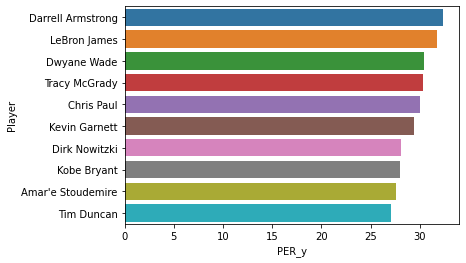

In [0]:
# Plot the players with the highest PER values to visualize the game's biggest stars 
dftrain3.sort_values('PER_y', ascending=False, inplace=True)

top_10_df = dftrain3.iloc[:10,]
top_10_plot = sns.barplot(y=top_10_df.index, x="PER_y", data=top_10_df)
display(top_10_df.iloc[:,-1])

Among all players in the dataset, Darrell Armstrong had the highest peak PER (32.4 in 1996), followed by LeBron James (31.7 in 2009) and Dwyane Wade (30.4 in 2009). 

While it is not surprising to see the names of so many outstanding players and future Hall of Famers in the top 10, it is surprising to see Darrell Armstrong at the top. Anecdotally, he is less known than any other player on the list. Investigating further, we can see this is because Armstrong was a relative 'one-hit wonder', registering PER above 23 in just a single season. Comparatively, LeBron James, who many consider to be the greatest player in the modern era, registered PER above 23 in 13 different seasons, including 4 seasons with PER above 30.

Next, we wanted to investigate the relationships between our target and each of our features, since independent linear relationships is an assumption of linear regression as a modelling technique. 

In [0]:
# Define a function to calculate R-squared 
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

,R2 with PER_y
PER_y,1.000000e+00
PER_x,7.190283e-01
WS,4.141383e-01
PTS,3.720136e-01
TS%,3.682500e-01
MP,3.381021e-01
eFG%,3.160963e-01
TOV,3.144813e-01
2P%,2.943544e-01
STL,2.897720e-01


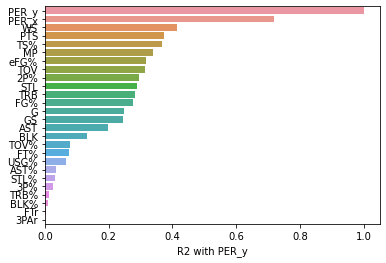

In [0]:
# Call this function to build a DataFrame containing correlations between each feature and the target (PER_y) 
feature_temp_list, r2_temp_list = [],[]

for feature in list(dftrain3):
    feature_temp_list.append(feature)
    r2_temp_list.append(r2(dftrain3[feature], dftrain3['PER_y']))

r2_df = pd.DataFrame(r2_temp_list, columns=['R2 with PER_y'], index=feature_temp_list)
r2_df.sort_values('R2 with PER_y', ascending=False, inplace=True)
display(r2_df)

# Visualize this data in a barplot
corr_barplot = sns.barplot(y=r2_df.index, x="R2 with PER_y", data=r2_df, label="PER_y")


In [0]:
# Building a new dataset to analyze a subset of attributes 
droplist31=["TS%", 	"TRB%", 	"AST%", 	"STL%", 	"TS%", "TRB%", "BLK%", 	"TOV%", 	"USG%", "FG%", 	"3P%", 	"2P%", 	"eFG%", 	"FT%"]
dfcharts=dftrain3.head(550)
dfcharts=dfcharts.drop(columns=droplist31)


In [0]:
dfcharts.corr()

,G,GS,MP,PER_x,3PAr,FTr,WS,TRB,AST,STL,BLK,TOV,PTS,PER_y
G,1.000000,0.680374,0.857092,0.306452,-0.050744,-0.079042,0.696799,0.679724,0.545424,0.684036,0.417402,0.748065,0.761373,0.142652
GS,0.680374,1.000000,0.910179,0.436413,-0.054454,-0.080094,0.774979,0.744419,0.613803,0.710036,0.486568,0.849668,0.866673,0.237472
MP,0.857092,0.910179,1.000000,0.462462,-0.010342,-0.108356,0.838612,0.781476,0.681858,0.796309,0.466845,0.913591,0.944069,0.263974
PER_x,0.306452,0.436413,0.462462,1.000000,-0.079652,0.148929,0.656766,0.467581,0.326318,0.400166,0.341354,0.466177,0.557584,0.549011
3PAr,-0.050744,-0.054454,-0.010342,-0.079652,1.000000,-0.427112,-0.057669,-0.300609,0.173754,0.085317,-0.326147,-0.023771,-0.023527,0.016475
FTr,-0.079042,-0.080094,-0.108356,0.148929,-0.427112,1.000000,0.074953,0.145661,-0.203297,-0.135308,0.182891,-0.052921,-0.108511,0.128217
WS,0.696799,0.774979,0.838612,0.656766,-0.057669,0.074953,1.000000,0.744954,0.555769,0.675606,0.483821,0.732189,0.828827,0.455598
TRB,0.679724,0.744419,0.781476,0.467581,-0.300609,0.145661,0.744954,1.000000,0.244139,0.456211,0.731340,0.687387,0.729499,0.258182
AST,0.545424,0.613803,0.681858,0.326318,0.173754,-0.203297,0.555769,0.244139,1.000000,0.821521,-0.017449,0.760382,0.614630,0.224369
STL,0.684036,0.710036,0.796309,0.400166,0.085317,-0.135308,0.675606,0.456211,0.821521,1.000000,0.188339,0.796623,0.727427,0.251046


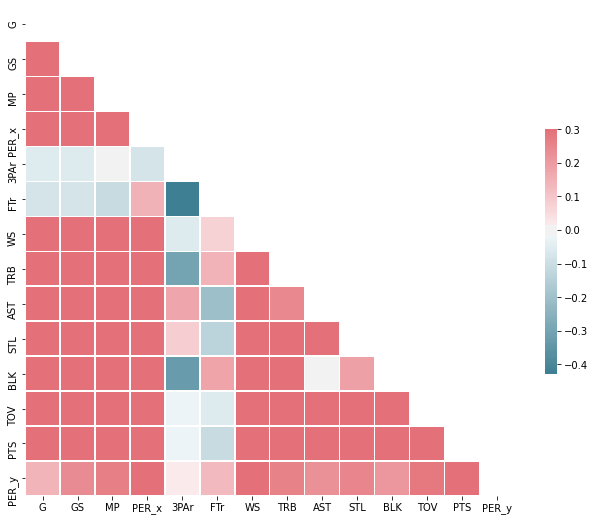

In [0]:
# Visualize the correlations between variables using heatmaps
corr = dfcharts.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

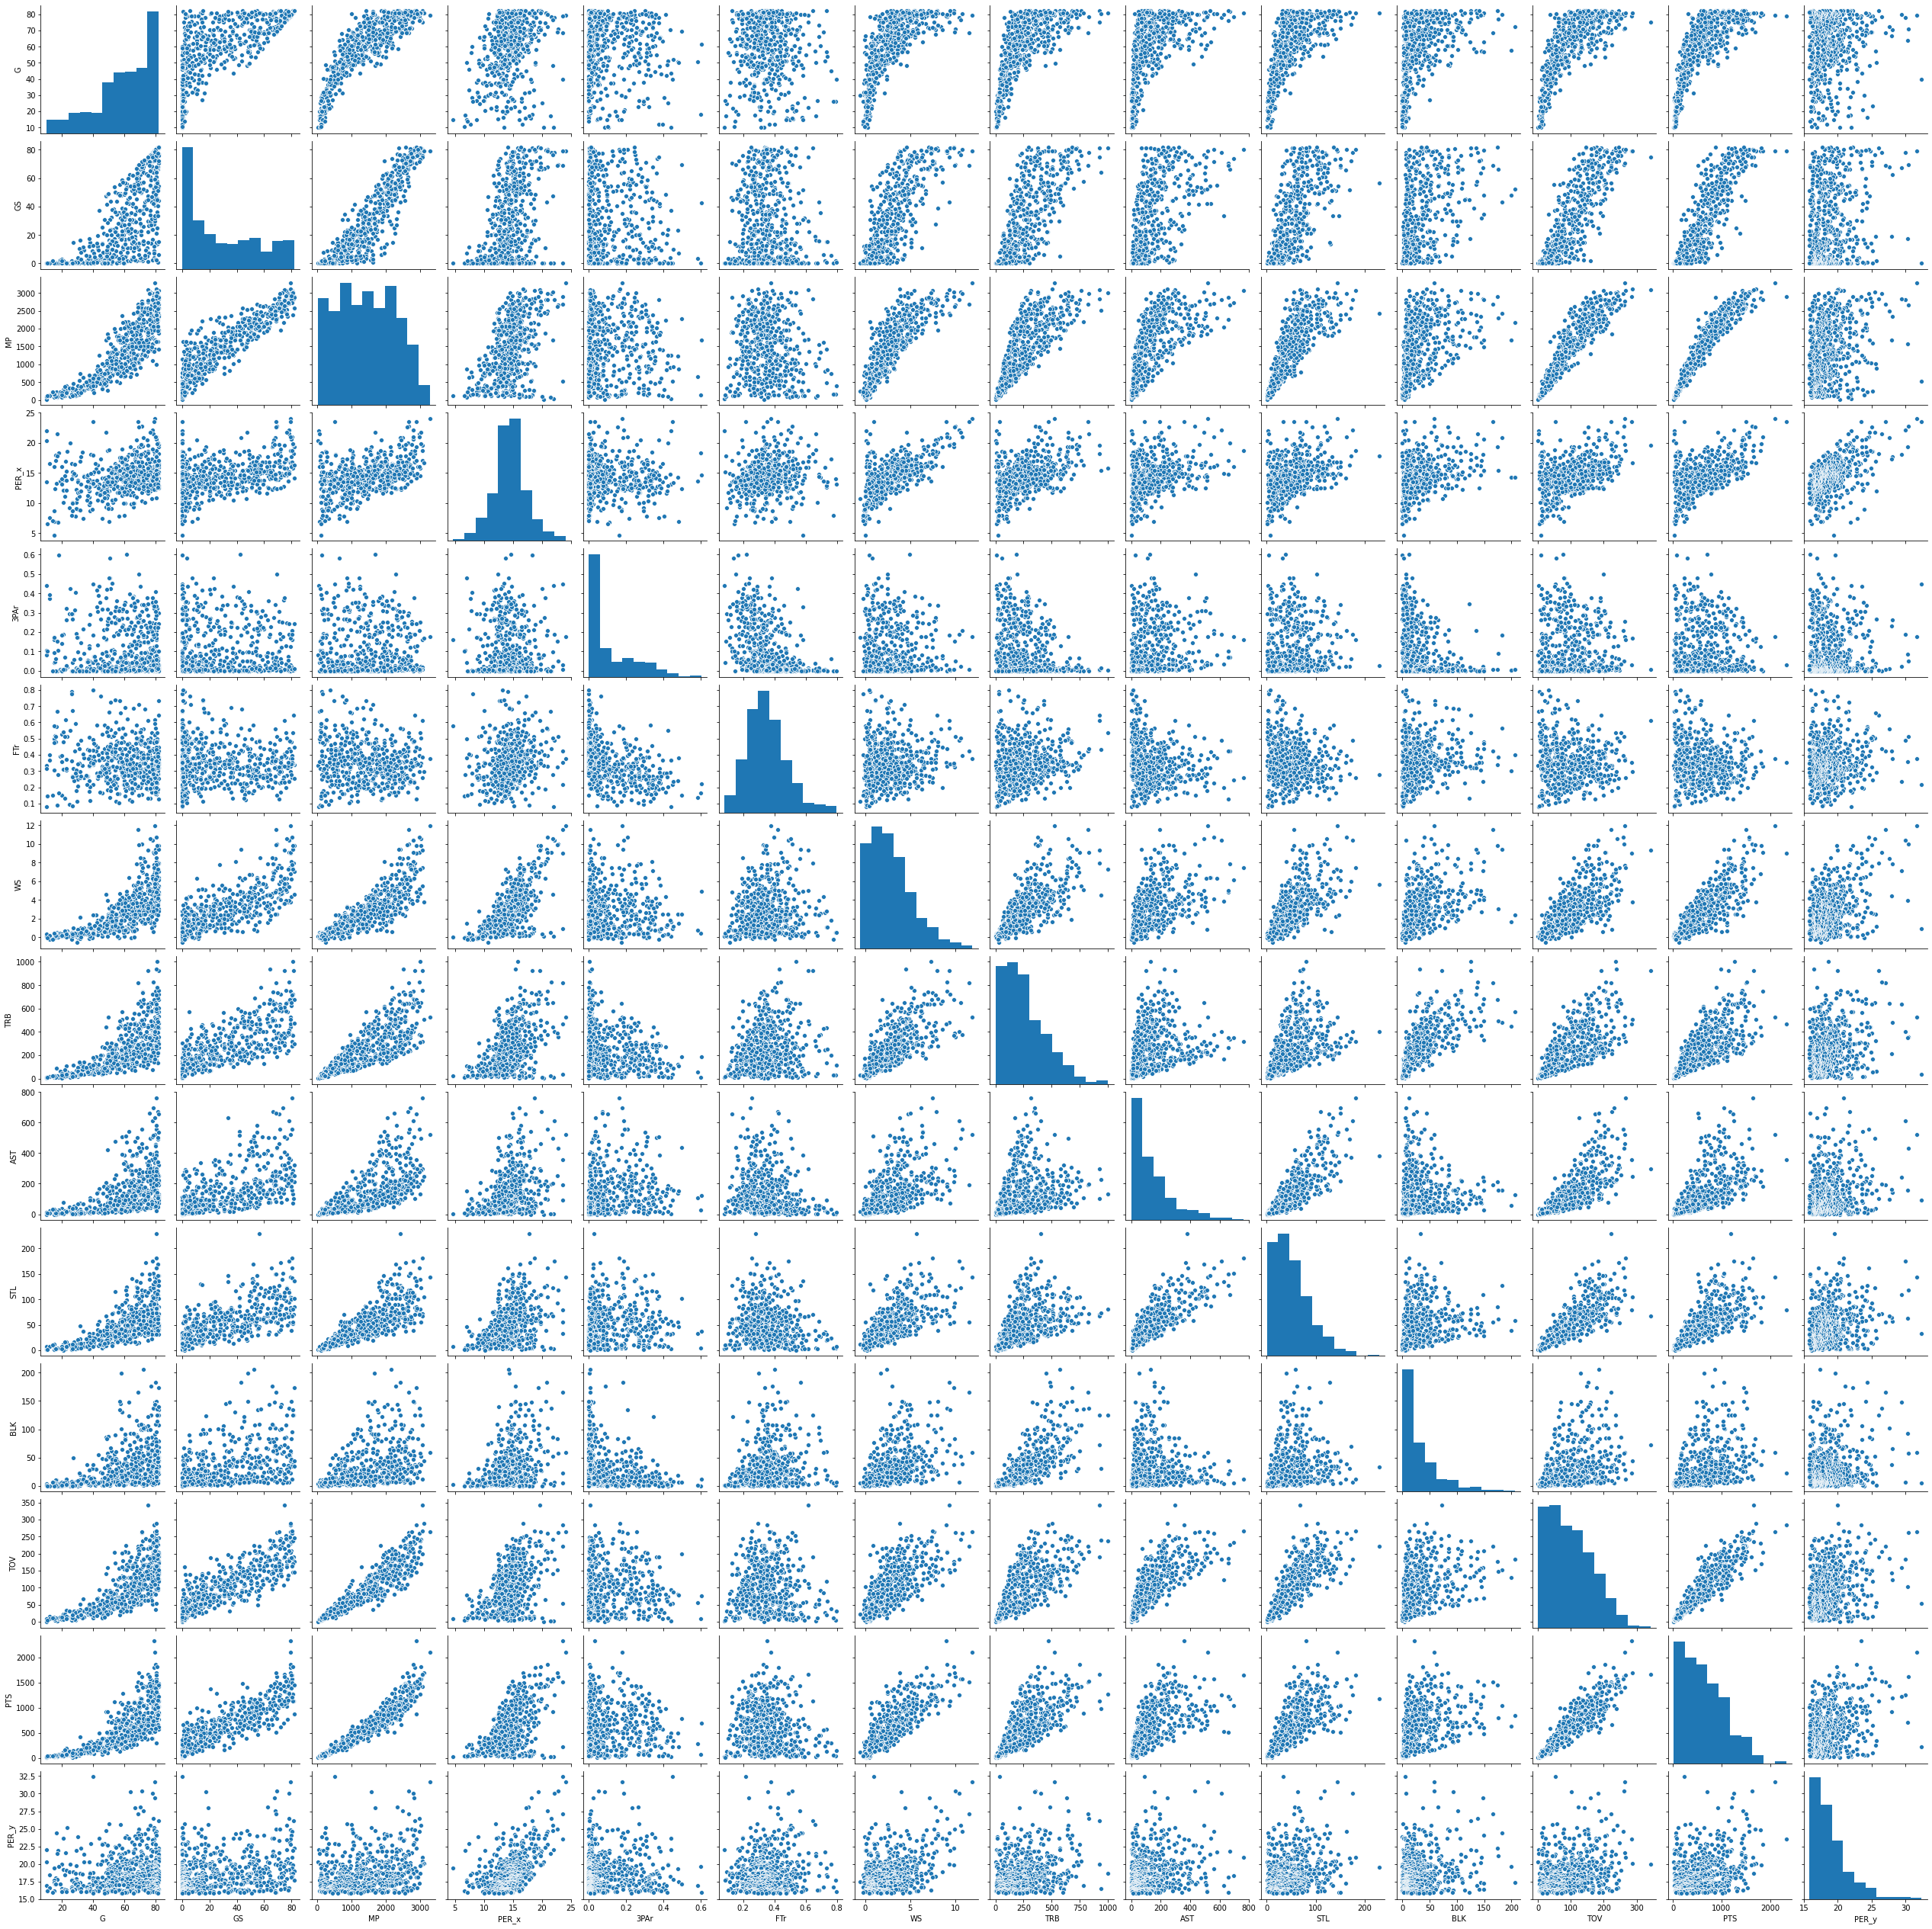

In [0]:
#Distribution
sns.pairplot(dfcharts)

Unsurprisingly single-season PER (PER_x) was most correlated with career max PER (PER_y) among all our features. Beyond this, the stats most correlated to PER_y were Win Share (WS), Points (PTS), True Shooting % (TS%), and Minutes Played (MP).

Leveraging our domain knowledge, these high correlations are logical because all 4 statistics are intuitively associated with basketball talent. Win Share estimates the number of wins contributed by a player (5), and is a catch-all advanced statistic similar to PER. Points are a key input to the PER calculation that can be understood by even the most casual of fans. True Shooting % is a measure of shooting talent that takes into account field goals, 3-pt field goals, and free throws (5), and finally it's logical minutes played would be correlated as coaches would give better players more minutes.

The heatmap above shows the correlation coefficients for key numeric relationships. We can see strong relationship between almost all variables, except FTr (Free Throw Attempt Ratio) and 3PAr (3-Point Attempt Ratio). These statistics represent the distribution of different types of shots, and have very little correlation with our target. This is logical considering we replaced missing values with 0 for these features and wouldn't expect all basketball favours to favour certain types of shots over others. Some stars excel with 3-point shots for example, while others would attack the net more and get more of their points through Free Throws.

Next, we've chosen to visualize specific statistical relationships. Plotting points (x-axis below), assists, and field goal percentage, we can see that most players have relatively few assists and points, but there was a scattering of impressive dual-threat seasons with high point and assist totals. This measurement is valuable to understanding how a player creates offense - by themselves, or through their teammates.


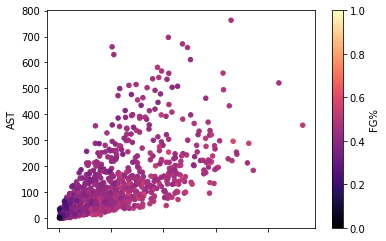

In [0]:
ax2 = dftrain3.plot.scatter(x='PTS', y='AST',c='FG%', colormap='magma')

Turnovers and steals (x-axis below) are more strongly correlated, possibly reflecting a player's aggressiveness or propensity for risk-taking. Understanding where a player falls on this relationship is critical from a management perspective, as having control of the basketball is critical to winning games.

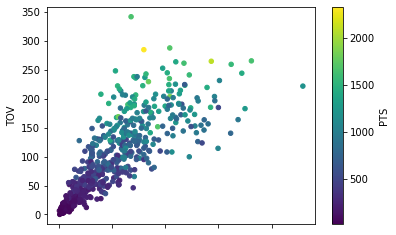

In [0]:
ax2 = dfcharts.plot.scatter(x='STL', y='TOV',c='PTS', colormap='viridis')

## 8. Baseline Regression Model

Now that we have prepared, analyzed, and visualized our data, we can begin to build our initial linear regression model.

In [0]:
# Define X and Y.
X=dftrain3.loc[:, dftrain3.columns!= 'PER_y'] 
y=dftrain3['PER_y']

In [0]:
# Normalize the variables so they are all on the same scale.
X = preprocessing.normalize(X) 

In [0]:
# Split into training data (80%) and testing data (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(1129, 25)

In [0]:
# Build and fit a linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Use this model to make predictions on test data 
y_pred = regressor.predict(X_test) 

In [0]:
# Compare predicted PER to actual PER
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
Player,,
Hedo Turkoglu,17.8,17.397157
Michael Wilson,15.5,17.348942
Ron Grandison,10.1,12.357891
Joe Kopicki,15.3,17.171419
Devin Durrant,8.8,12.613257
John Thomas,13.7,11.639263
Andre Spencer,16.4,18.331426
Chris Mills,16.2,16.569722
Andris Biedrins,19.2,16.894287


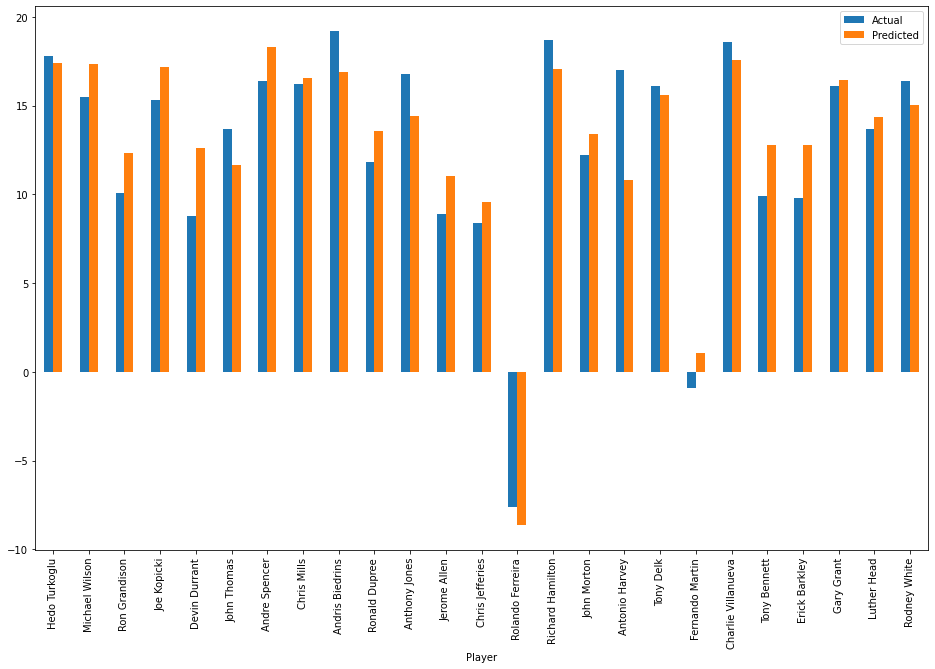

In [0]:
#Visualize our predictions
df.head(25).plot(kind='bar',figsize=(16,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


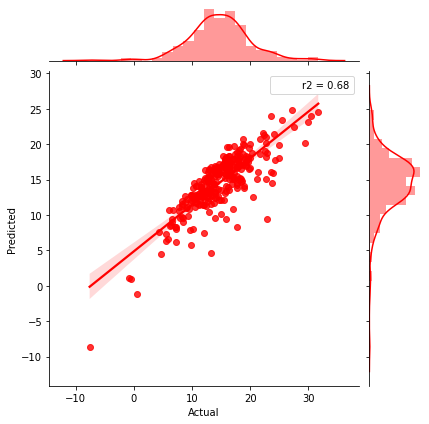

In [0]:
sns.jointplot(x="Actual", y="Predicted", data=df, kind="reg", color="r", stat_func=r2);

In [0]:
#Run model evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1868927218146945
Mean Squared Error: 8.363118432092797
Root Mean Squared Error: 2.8919056748263414


Above we can see the model run on 25 players. It is clear that the model has potential, as visually we can see that many of the predictions were within +/- 2 of actual PER. In the case of Mike Dunleavy, Terry Dehere and Kenny Green, the model was practically spot on!

When comparing actual and predicted PER, we can see that these factors are strongly correlated. Our model has an R-squared of 0.68, mean absolute error of ~2.19, mean squared error of ~8.36, and root mean squared error of ~2.89. 

## 9. Improving Model Performance

Now that we have established and evaluated a baseline model, we will explore a few methods that we believe may improve our model's performance. Models will be built following the same methodology as above, and commenting will be intentionally sparser to improve legibility.

1st Method: Use 2007 to 2012 as testing data. Recall that our baseline model used 20% of the data from 1984 to 2006 as testing data.

In [0]:
dftest=dffinal[(dffinal.Year>=2007) & (dffinal.Year<=2012)]
dftest=dftest[(dftest.Season<=3) & (dftest.Season>=0)]
dftest2=dftest.merge(MAXPER, left_on='Player', right_on='Player') #Merge  target onto the training set.
dftest3=dftest2.groupby(by="Player").mean() # Take the average of the player's first three years.
dftest3=dftest3.dropna(axis=0)
droplist3=["Year", "Season", "year_start", "Age"] 
dftest3=dftest3.drop(columns=droplist3) # Drop unnecessary columns

y2=dftest3['PER_y']
X2=dftest3.loc[:, dftest3.columns!= 'PER_y']
X2_normalized = preprocessing.normalize(X2)
y_pred2 = regressor.predict(X2_normalized) 
y_pred2.shape

(464,)

In [0]:
df4 = pd.DataFrame({'Actual': y2, 'Predicted': y_pred2})
df4.head(25)

,Actual,Predicted
Player,,
A.J. Price,17.1,15.484093
Aaron Brooks,16.0,18.095941
Aaron Gray,18.4,16.427935
Acie Law,16.0,12.837810
Adam Morrison,7.9,10.838764
Al Horford,22.0,19.321781
Al Jefferson,23.1,20.884891
Al Thornton,12.7,14.684458
Al-Farouq Aminu,14.4,12.530940


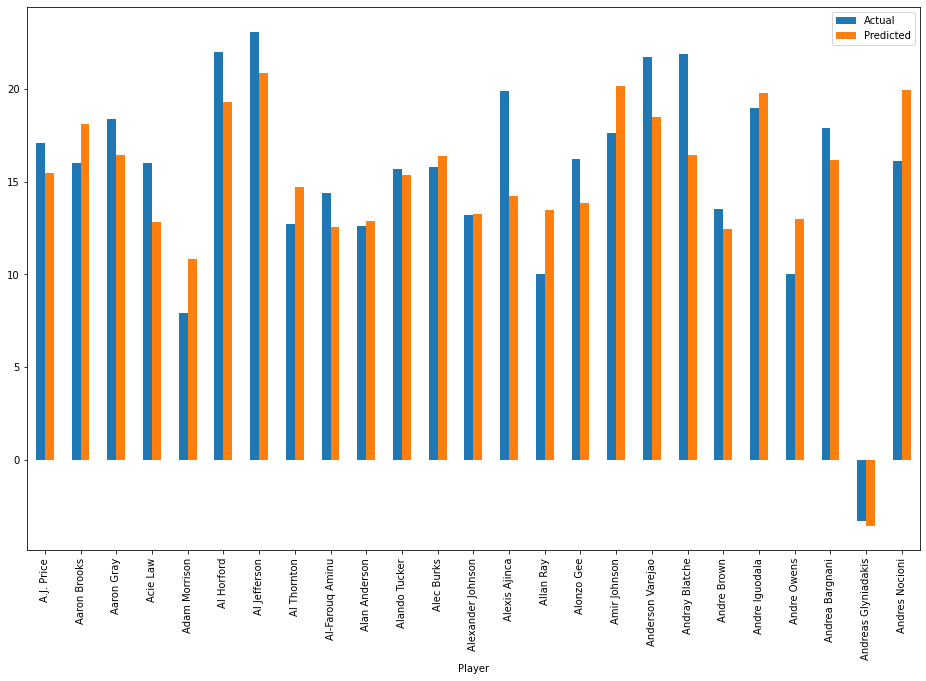

In [0]:
df4.head(25).plot(kind='bar',figsize=(16,10))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


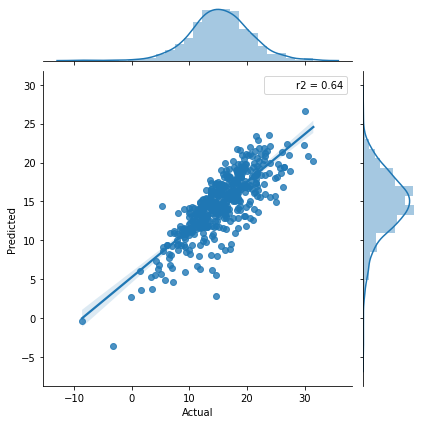

In [0]:
sns.jointplot(x="Actual", y="Predicted", data=df4, kind="reg", stat_func=r2);

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred2)))

Mean Absolute Error: 2.351106949957624
Mean Squared Error: 9.938554088075263
Root Mean Squared Error: 3.1525472380402584


We can see that our model did not perform as strongly on this new testing data. The R-squared value of predicted vs actual PER has decreased to 0.64, while all our errors have increased.

This decrease in performance is not surprising given that the strategies and tactics used by basketball teams change over time. it is logical that our model would better predict player performance within the time frame where it was trained.  

2nd Method: Now let's re-train a regression using 100% of the data between 1984 to 2006 (rather than 80%) of the data. We will use this new regressor to predict performance for players from 2007 to 2012. 

In [0]:
X_train_Full = dftrain3.loc[:, dftrain3.columns!= 'PER_y'] 
X_train_Full_normalized = preprocessing.normalize(X_train_Full)
y_train_Full = dftrain3['PER_y']

regressor2 = LinearRegression()  
regressor2.fit(X_train_Full_normalized, y_train_Full)

y_pred4 = regressor2.predict(X2_normalized) # predicting on the same test data as in the previous section
y_pred4.shape

(464,)

In [0]:
df6 = pd.DataFrame({'Actual': y2, 'Predicted': y_pred4})
df6.head(25)

,Actual,Predicted
Player,,
A.J. Price,17.1,15.402792
Aaron Brooks,16.0,18.255907
Aaron Gray,18.4,16.494079
Acie Law,16.0,12.771344
Adam Morrison,7.9,10.780754
Al Horford,22.0,19.551234
Al Jefferson,23.1,21.119878
Al Thornton,12.7,14.738278
Al-Farouq Aminu,14.4,12.504336


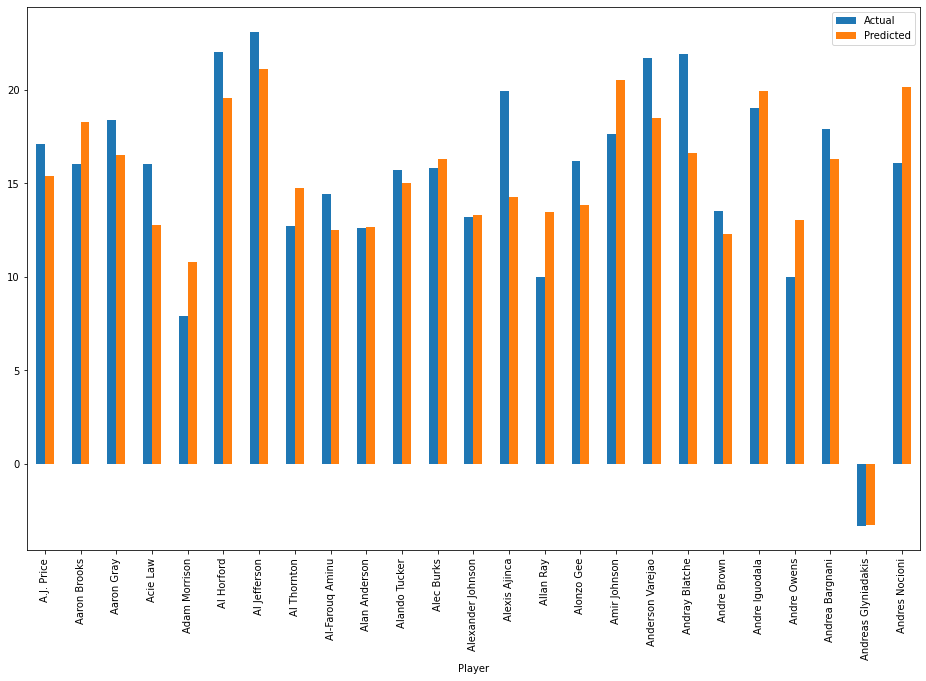

In [0]:
df6.head(25).plot(kind='bar',figsize=(16,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


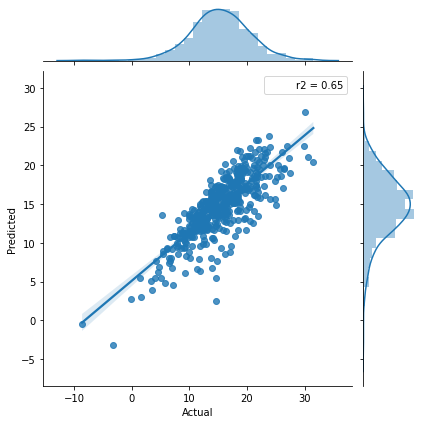

In [0]:
sns.jointplot(x="Actual", y="Predicted", data=df6, kind="reg", stat_func=r2);

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred4)))

Mean Absolute Error: 2.320908944714759
Mean Squared Error: 9.709921327664881
Root Mean Squared Error: 3.116074666574099


We can see that a model trained on 100% of the data from 1984 to 2006 performs better than a model trained on 80% of that data in terms of predicting performance from 2007 to 2012. Despite this, we can see from the R-squared and error values that we have not improved the baseline model performance, where the testing data and training data were from the same time period. As explained above, this is likely due to material changes in the game of basketball over this time period. 

3rd Method: Remove 'FTr' and '3PAr' features, as we saw these were not correlated with our target.

In [0]:
dftest=dffinal[(dffinal.Year>=2007) & (dffinal.Year<=2012)]
dftest=dftest[(dftest.Season<=3) & (dftest.Season>=0)]
dftest2=dftest.merge(MAXPER, left_on='Player', right_on='Player') 
dftest3=dftest2.groupby(by="Player").mean() 
dftest3=dftest3.dropna(axis=0)
droplist4=["Year", "Season", "year_start", "Age","3PAr","FTr"]  # We are dropping '3PAr' and 'FTr'
dftest4=dftest3.drop(columns=droplist4) 
y2=dftest4['PER_y']
X3=dftest4.loc[:, dftest4.columns!= 'PER_y']
X3_normalized = preprocessing.normalize(X3)
y2.shape

(464,)

In [0]:
droplist5=["3PAr","FTr"] # Drop these stats from the training data (above we dropped from test data)
dftrain4 = dftrain3.drop(columns = droplist5)

X_train_less = dftrain4.loc[:, dftrain4.columns!= 'PER_y'] 
X_train_less_normalized = preprocessing.normalize(X_train_less) 

regressor3 = LinearRegression()  
regressor3.fit(X_train_less_normalized, y_train_Full) # Training our model this time by new X values, Y values remain the same

y_pred5 = regressor3.predict(X3_normalized)

df7 = pd.DataFrame({'Actual':y2,'Predicted': y_pred5})
df7.head(25)

,Actual,Predicted
Player,,
A.J. Price,17.1,15.469089
Aaron Brooks,16.0,18.265422
Aaron Gray,18.4,16.479600
Acie Law,16.0,12.755752
Adam Morrison,7.9,10.960060
Al Horford,22.0,19.434654
Al Jefferson,23.1,21.143977
Al Thornton,12.7,14.826283
Al-Farouq Aminu,14.4,12.539102


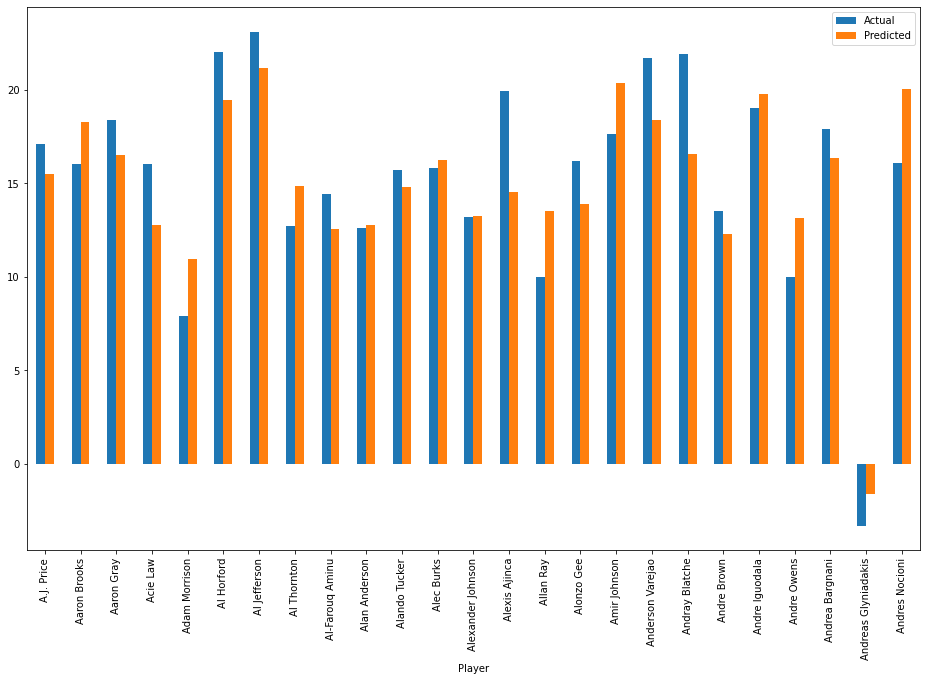

In [0]:
df7.head(25).plot(kind='bar',figsize=(16,10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


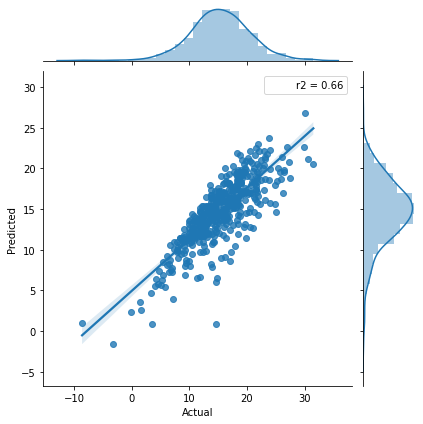

In [0]:
sns.jointplot(x="Actual", y="Predicted", data=df7, kind="reg",  stat_func=r2);

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred5)))

Mean Absolute Error: 2.280491263974075
Mean Squared Error: 9.464450988154233
Root Mean Squared Error: 3.076434785291935


While exclusing these two values has improved performe relative to the 2 methods above it, we have still not managed to improve upon our baseline. 

4th Method: Considering that the sport of basketball has likely changed over time, we can train our model using data starting in 1996, rather than 1984. 

In [0]:
dftrain5 = dftrain2[dftrain2.Year >= 1996]
dftrain6 = dftrain5.groupby(by="Player").mean()
dftrain6 = dftrain6.dropna(axis=0)
droplist6=["Year", "Season", "year_start", "Age"]
dftrain6=dftrain6.drop(columns=droplist6)

X_train_recent = dftrain6.loc[:, dftrain6.columns!= 'PER_y'] 
X_train_recent_normalized = preprocessing.normalize(X_train_recent)
y_train_recent = dftrain6['PER_y']

In [0]:
regressor4 = LinearRegression()  
regressor4.fit(X_train_recent_normalized, y_train_recent) 
y_pred6 = regressor4.predict(X2_normalized) # predicting on the same input set made in the last model
y_pred6.shape

(464,)

In [0]:
df8 = pd.DataFrame({'Actual': y2, 'Predicted': y_pred6})
df8.head(10)

,Actual,Predicted
Player,,
A.J. Price,17.1,16.211340
Aaron Brooks,16.0,19.046930
Aaron Gray,18.4,18.078899
Acie Law,16.0,13.236034
Adam Morrison,7.9,11.046356
Al Horford,22.0,20.353929
Al Jefferson,23.1,22.550550
Al Thornton,12.7,15.156191
Al-Farouq Aminu,14.4,13.104946


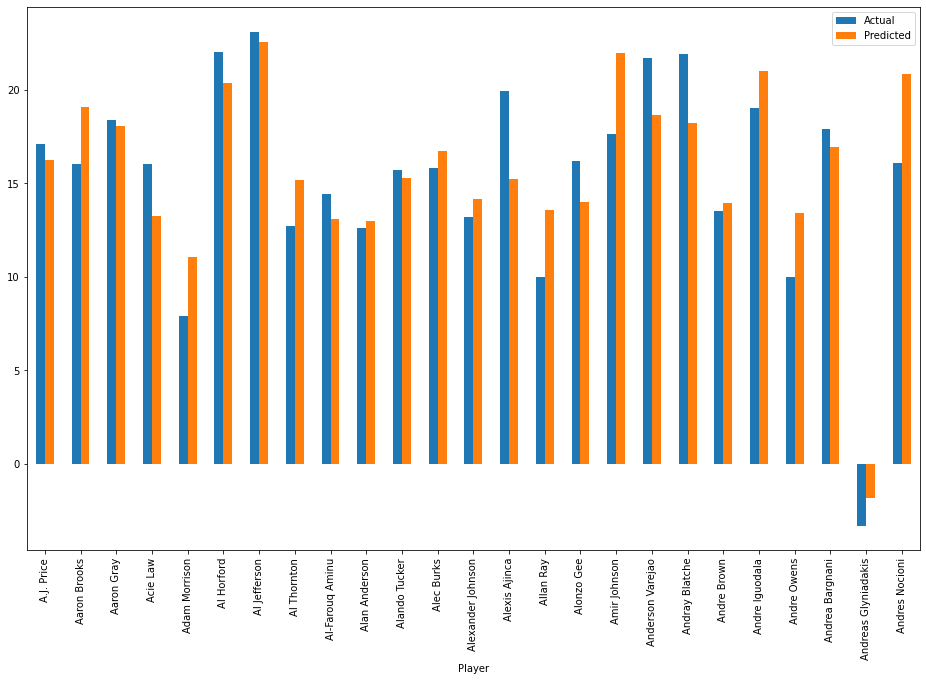

In [0]:
df8.head(25).plot(kind='bar',figsize=(16,10))
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2, y_pred6))
print('Mean Squared Error:', metrics.mean_squared_error(y2, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2, y_pred6)))

Mean Absolute Error: 2.3049648197619783
Mean Squared Error: 8.725179426385914
Root Mean Squared Error: 2.9538414694065613


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


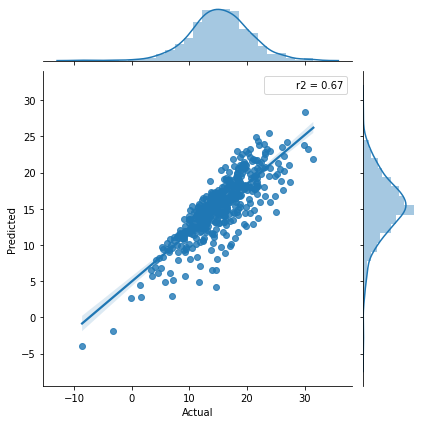

In [0]:
sns.jointplot(x="Actual", y="Predicted", data=df8, kind="reg",  stat_func=r2);

We can see from the R-squared and error values that this model performs better than the 3 methods above it, but still falls short of the performance of the baseline model.

## 10. Use Cases

The primary mission of an NBA team's management staff is to construct a championship-calibre roster by selecting which players to trade for and sign to contracts. Our findings - evaluating a player's career potential based on early-career performance - is material to both of these areas.  

Understanding which players are most likely to become superstars can be used to inform who to sign to contracts and at what financial terms. Allocation of financial resources is critically important because of the salary cap, as teams face penalties when their cumulative player salaries exceed the league-wide cap and must manage this salary cap carefully (7). It is critical to understand a player's future potential when giving them a contract, and our analysis can help teams ensure they are investing in the right players who are most likely to win them games and championships over the duration of the contract. Similarly, our analysis can help inform which players to target in trades, as there may be market inefficiencies where other teams do not realize the potential of certain players. 

To demonstrate these uses, we have applied our model to predict the career peak PER of many young NBA players drafted between 2017 and 2019. We can see that Nikola Jokic, Giannis Antetokounmpo, Joel Embiid, and Karl-Anthony Towns emerge as most likely to achieve high peak PER.

It is interesting to see Nikola Jokic ahead of Giannis Antetokounmpo. Giannis is considered the league's best young player while Jokic, despite being very good, is generally overlooked. If our model were accurate, it could present an opportunity for a data-driven team to aquire Jokic now, while he is still relatively underrated. 



In [0]:
# Use the model to predict PER for current young players
dftest2017=dffinal[(dffinal.Year>=2017) & (dffinal.Year<=2019)]
dftest2017=dftest2017[dftest2017.Age<=22]
dftest2017=dftest2017.groupby(by="Player").mean() #Take the average of the three years the player spent in the league
dftest2017=dftest2017.dropna(axis=0)
droplist3=["Year", "Season", "year_start", "Age"] 
dftest2017=dftest2017.drop(columns=droplist3) #Drop columns we wont need inside our model
X2017=dftest2017.loc[:, dftest2017.columns!= 'PER_y']
X2017_normalized = preprocessing.normalize(X2017)
y_pred2017 = regressor4.predict(X2017_normalized)
playerlist=X2017.index

In [0]:
df7 = pd.DataFrame({'Player':playerlist, 'Predicted': y_pred2017})
print(df7.sort_values(by='Predicted',ascending=False).head(10))

                   Player  Predicted
60           Nikola Jokic  30.004961
28  Giannis Antetokounmpo  29.533996
41            Joel Embiid  28.728960
47     Karl-Anthony Towns  27.860130
11           Clint Capela  24.983005
59           Nerlens Noel  23.230757
83      Willy Hernangomez  22.471303
58           Myles Turner  22.329642
46           Jusuf Nurkic  22.211588
32          Jabari Parker  22.095853


## 11. Limitations

Although PER is a strong  measure of overall basketball talent, it is not perfect. There are two main areas in which it is deficient as a metric: 1) defensive talent and 2) qualitative 'intangibles'.

PER is worse at measuring defensive talent than offensive talent because defensive talent remains inherently more difficult to quantify. Defense can be thought of as the suppression (rather than creation) of scoring events, meaning that there are comparatively fewer basketball statistics that accurately meaure defensive ability. Good defense is often more subtle than good offense, and if a player fails to score on a given possession it is difficult to quantify the impact of how well they were defended. PER does its best by making use of many common defensive stats - blocks, rebounds, steals, etc. - but nonetheless remains an imperfect measure of defensive talent because it is hard to measures events (like successful baskets) that do not happen.

PER is blind to all qualitative and intangible factors. Basketball is played on the court, not on a spreadsheet, and so there are many things that impact individual and team-level success that do not show up in a player's statistics. For example, PER does not tell us whether a player is a good leader, whether they are dedicated to their craft and committed to improving, how open they are to feedback from coaches, how they interact with teammates, or what impact they have on team morale. These are all important considerations for NBA managers as they assemble their teams, but PER is blind to these considerations and others like them. For these reasons, we believe that statistics such as PER are most powerful when used to supplement traditional evaluations of player talent ("the eye test"), not replace them altogether. 


In terms of our model's predictions, there were many instances where our model was way off. Let's explore a few of these misses. 



In [0]:
diff=abs(y2-y_pred6)
df8 = pd.DataFrame({'Actual': y2, 'Predicted': y_pred6, 'difference':diff})
print(df8.sort_values('difference', ascending=False).head(10))

                  Actual  Predicted  difference
Player                                         
Von Wafer           14.7   4.125627   10.574373
Jimmy Butler        25.1  14.567285   10.532715
Stephen Curry       31.5  21.862260    9.637740
Kawhi Leonard       27.5  18.664187    8.835813
Hassan Whiteside    26.2  17.541637    8.658363
Bobby Jones         21.1  12.841868    8.258132
Stephen Graham      21.9  13.751893    8.148107
Enes Kanter         24.9  16.778174    8.121826
DeMar DeRozan       24.0  15.896677    8.103323
Randolph Morris     14.6   6.519782    8.080218


Looking at the largest absolute differences between predicted max PER and actual max PER it is clear that our model has a tendency to be conservative and underestimate the potential of some players. 

Looking at the list above, we see superstars like Stephen Curry, Jimmy Butler, and Kawhi Leonard all being undervalued. This reflects the fact that their first three years within the league were fairly lacklustre; they really only emerged as stars later on. 

In fairness to our model, many NBA teams made the same mistake. Kawhi Leonard was traded by his first team only to emerge as a superstar on his second team.

In [0]:
diff=abs(y-y_pred6)
df8 = pd.DataFrame({'Actual': y, 'Predicted': y_pred6, 'difference':diff})
print(df8.sort_values('difference', ascending=True).head(20))

                  Actual  Predicted  difference
Player                                         
Courtney Lee        14.6  14.593337    0.006663
Mickael Gelabale    11.8  11.788892    0.011108
Jerryd Bayless      17.7  17.665898    0.034102
Walker Russell       9.5   9.463853    0.036147
Greivis Vasquez     16.3  16.361233    0.061233
Tarence Kinsey      13.0  13.071350    0.071350
Sundiata Gaines     17.3  17.224685    0.075315
Mario West          10.0  10.085033    0.085033
Wilson Chandler     16.6  16.509502    0.090498
Paul Millsap        21.8  21.701016    0.098984
Dorell Wright       16.0  16.100787    0.100787
Rodney Stuckey      18.4  18.526375    0.126375
Vernon Macklin      18.2  18.061482    0.138518
Elliot Williams     18.8  18.659562    0.140438
P.J. Tucker         13.3  13.452543    0.152543
Quincy Pondexter    11.1  10.935666    0.164334
Ronnie Brewer       18.4  18.574613    0.174613
Jared Dudley        15.6  15.779540    0.179540
Hasheem Thabeet     12.9  12.712979    0

But we also see instances where our model was incredibly accurate. The players listed above were mostly solid contributors, although not stars. 

Therefore, we believe that while our model is fairly effective, it would require additional work in order to be able to predict superstars who had a poor first few seasons. The ability to do that would likely be of great interest to NBA organizations.

## 12. Conclusion

We can take this opportunity to answer the questions we set out in our objectives.


1.   How accurately can we predict peak performance using a player's first 3 NBA seasons?

As we can see with our model's strong R-squared value, a player's first 3 seasons are quite predictive of their future peak performance. This validates the legitimacy of our analysis, as we believe NBA managers should use our findings in evaluating the future potential of young players as outlined above.

An area of future analysis would be improving the model's ability to predict stars who have underwhelming early seasons. 



2.   Which current young NBA players are most likely to achieve the highest peak performance?

As shown above, the young NBA players most likely to become superstars according to our model are Nikola Jokic, Giannis Antetokounmpo, Joel Embiid, and Karl-Anthony Towns. NBA managers should prioritize acquiring these high-potential players.


3.   How should NBA managers use our findings?

As outlined above, NBA managers should use our findings to supplement their evaluations of young NBA players to identify future potential. Quantitative analysis serves a key role in this process, and should be used in conjunction with an understanding of the NBA landscape to identify market inefficiencies and inform which players to target in trades and sign to contracts.

##13. Glossary

1.	Player Efficiency Rating: Sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

2.	Free Throws (FT/FTM):	An attempt at the basket from the free throw line (worth one point) given to a player following a foul or other infraction

3.	Field Goals (FG/FGM):	A basket scored while the ball is in play. This includes both 2 pointers and 3 pointers and excludes free throws

4.	Points (PTS):	Accumulated by making field goals or free throws. At the end of regulation, the team with the most points wins the game. 

5.	Assists (AST):	The number of passes that lead directly to a made field goal by a player

6.	Blocks (BL):	The number of times a player on the defensive end blocks an attempted shot by the offence

7.	Rebounds (RB):	When a player recovers the ball after a missed shot (on either offense or defense)

8.	Steals (ST):	When a player on defense is able gain possession of the ball through a legal turnover. 

9.	2 Pointers:	Field goals made inside or on the three-point line (worth 2 points)

10.	3 Pointers:	Field goals made outside the three-point line (worth 3 points)

11.	Field Goal Percentage (FG%):	Percentage of field goals made to field goals attempted

12.	Free Throw Percentage (FT%):	Percentage of free throws made to free throws attempted

13.	True Shooting %:	A shooting percentage that accounts for the value of the shot made (3 pters, 2 pters and free throws)

14.	MIN:	Minutes Played

15.	FTr (Free Throw Attempt Ratio):	Ratio of free throws attempted per field goal attempted

16.	3PAr (3-Point Attempt Ratio):	Ratio of 3-Points attempted per field goal attempted


## 14. Sources



1.   Why Nerds Rule the NBA (https://www.nytimes.com/2019/11/27/sports/basketball/nba-analytics.html)
2.   Calculating PER (https://www.basketball-reference.com/about/per.html)
3.   NBA Player Stats Since 1950 (https://www.kaggle.com/drgilermo/nba-players-stats)
4.   Basketball Reference Home Page (https://www.basketball-reference.com/)
5.   Basketball Reference Glossary (https://www.basketball-reference.com/about/glossary.html)
6.   The NBA's Six Year, $250M Data Deal (https://www.forbes.com/sites/darrenheitner/2016/09/22/the-nbas-six-year-250-million-data-deal/#4b0d85eb481d)
7.   NBA 2019-2020 Cap Tracker (https://www.spotrac.com/nba/cap/)

